# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Q: Why is this problem important to solve?
 - A: Although the used car market in India is expanding rapidly, there are significant uncertainties regarding pricing and availability. Due to the various factors that influence the value of a car, such as mileage, brand, model, and year, used car sellers face challenges in accurately predicting the worth of their vehicles. This situation is crucial to address because it ensures that used car sellers receive fair and precise compensation, while also safeguarding the growth of the used car market.

### **The objective:**

 - Q: What is the intended goal?
 - A: Our goal is to create a reliable pricing model that can predict the value of used cars based on their known attributes. By providing accurate pricing information, this model will assist businesses and sellers in developing profitable strategies for the sale of used cars.

### **The key questions:**

- What is the relationship between the different attributes and the price of a used car in the Indian market? 
- Which attributes have the greatest impact on the price of a used car?
- How accurate can we expect the pricing model to be? 
- Are there any outlier data points that could skew the model's accuracy? 
- How can we validate the pricing model to ensure its effectiveness in predicting the price of a used car? 



### **The problem formulation**:

- Q: What is it that we are trying to solve using data science?
- A: We aim to construct a regression pricing model using data science techniques. Our model will utilize a used car data set, which includes key attributes such as the serial number, brand and model name, selling location, manufacturing year, total kilometers driven, fuel type, transmission, ownership, standard mileage, offered price, engine capacity, power, number of seats, and the price of a new car of the same model. The goal is to accurately predict the value of a used car by identifying and utilizing the most significant features in the data set.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [3]:
data = pd.read_csv("used_cars.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
data.head() #Look at first 5 rows to draw some insights

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [5]:
data.tail() #Look at last 5 rows to draw some insights

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights: Looking at the data.head() method, we can see the first five rows of the dataset. This gives us an idea of the structure of the data, what columns are included, and the type of values in those columns. From the first few rows of the data, we can see that the dataset contains information about used cars. Specifically, we can see that there are columns for the name of the car, the year it was made, the selling price, the mileage, the engine size, the fuel type, and whether the car is a private or trade sale.
Similarly, looking at the data.tail() method shows us the last five rows of the dataset, which can give us an idea of the total number of rows in the dataset and whether there are any patterns or trends in the data towards the end of the dataset.
In summary, data.head() and data.tail() can provide an initial understanding of the structure and content of the dataset.**

In [6]:
data.info() #Check on data types in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [7]:
data.isnull().sum() # Check total number of missing values of each column. Hint: Use isnull() method

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations: For S.No. the number of unique values are equal to the number of observations and it doesn't hold any real value though it has no null values and we can drop this column.**

In [8]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop('S.No.', axis=1, inplace=True)

In [9]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage', ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


**Observations: Mileage cannot be zero and therefore we will treat these as Missing Values.**

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [10]:
data.describe(include = "all").T # Explore basic summary statistics of numeric variables. Hint: Use describe() method.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


In [11]:
data.describe(include=['object']).T # Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Find number of unique observations in each category**

In [12]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].value_counts())
    
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Typ

**Observations: Kilometers_driven has extreme values and thus we can exercise a log function on it so it ca contribute more helpfully to our data. A mileage of 0 for cars in the dataset would imply that they have never been driven, which doesn't make sense and thus we will need to address that issue as well.**

In [13]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


In [14]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(2328, inplace=True)

**Observations: We have a car manufactured in 2017 that has 6500000 km that will need to be dropped as that is unrealistic.**

In [15]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage', ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perform the log_transformation(if needed) and write down your observations?

In [16]:
def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

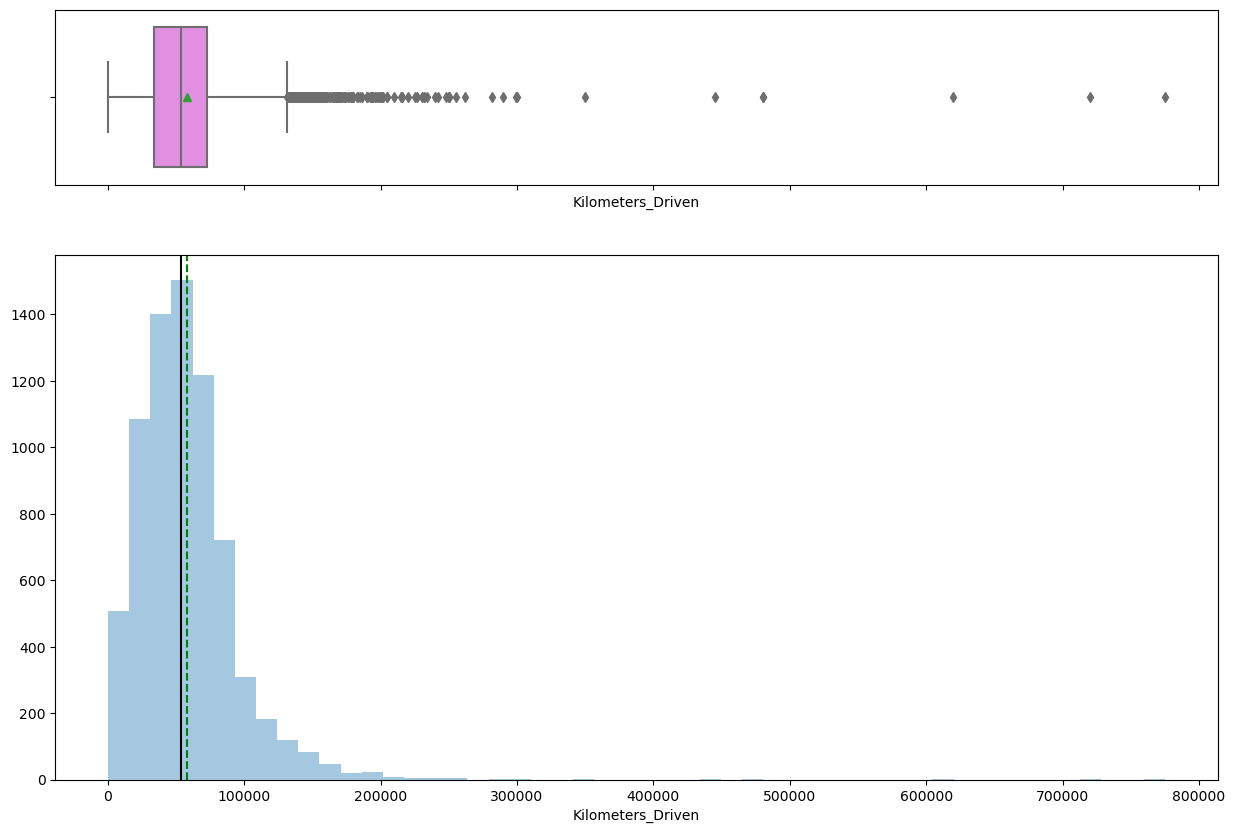

In [17]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Observations: It is rightly skewed and we cannot include that skewed data for the sake of building our models so we can apply a log transformation.**

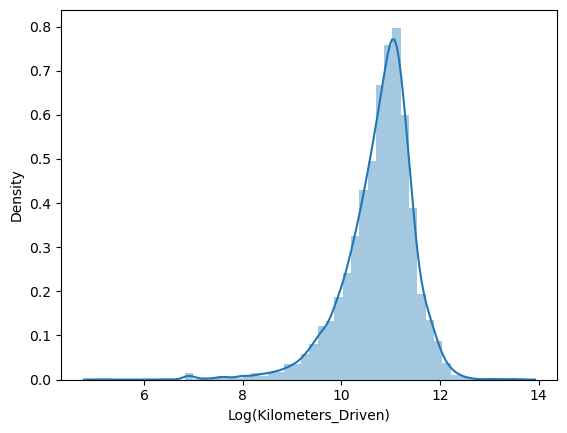

In [18]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

In [19]:
 #We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

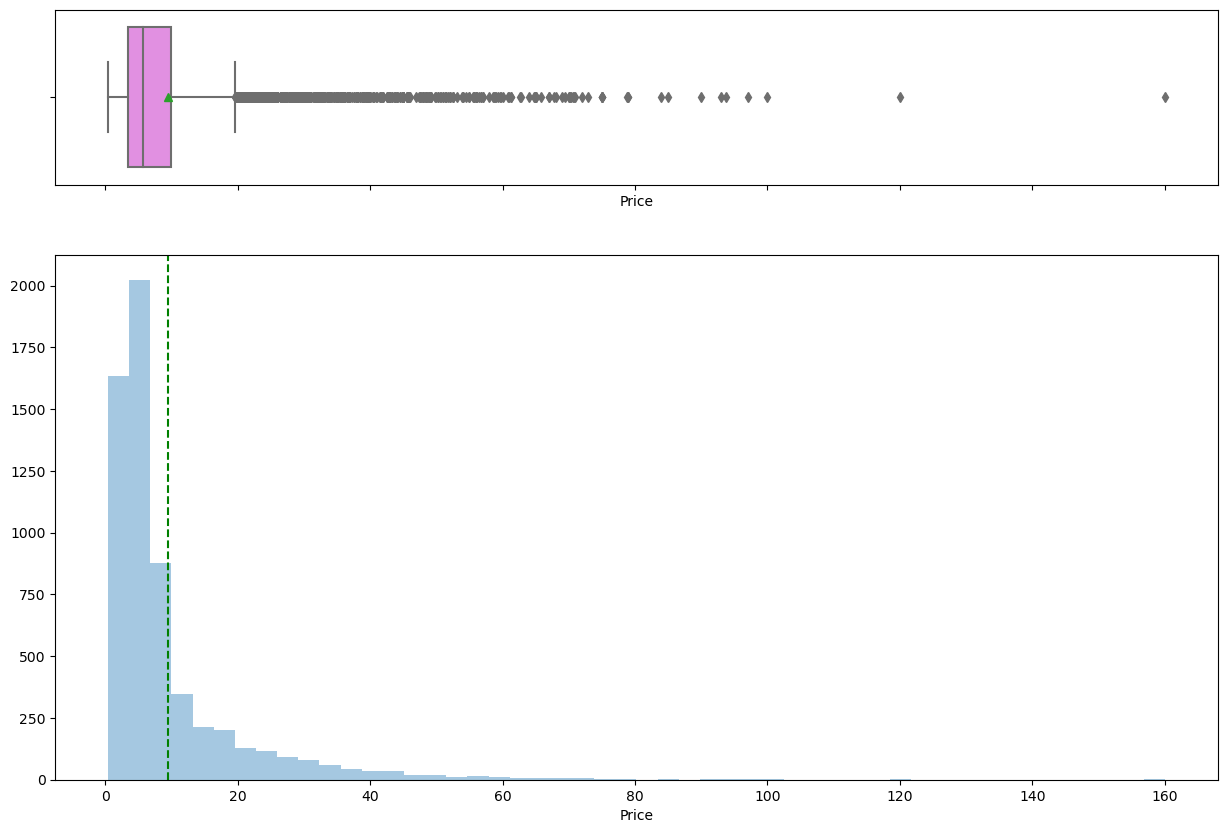

In [20]:
histogram_boxplot(data['Price']) # Plot histogram and box-plot for 'Price'

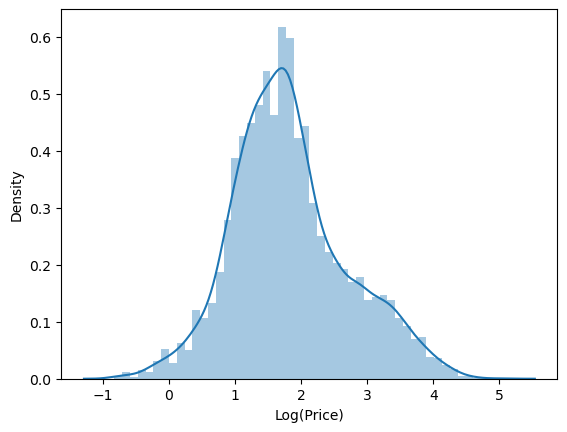

In [21]:
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)"); # Log transformation of the feature 'Price'

In [22]:
data["Price_log"] = np.log(data["Price"]) # We can Add a transformed Price feature in data

In [23]:
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

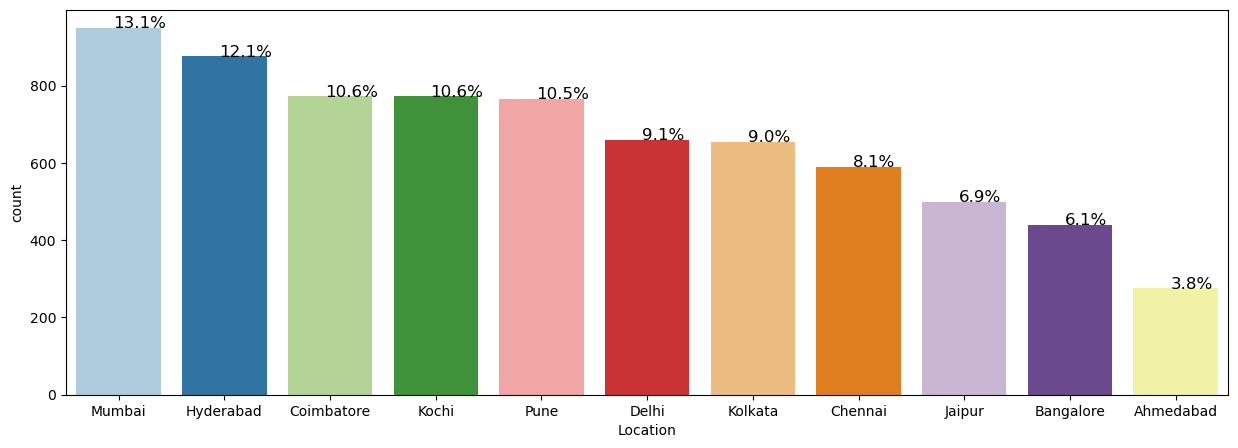

In [24]:
# Bar Plot for 'Location'
perc_on_bar('Location')

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

<AxesSubplot:xlabel='Price_log'>

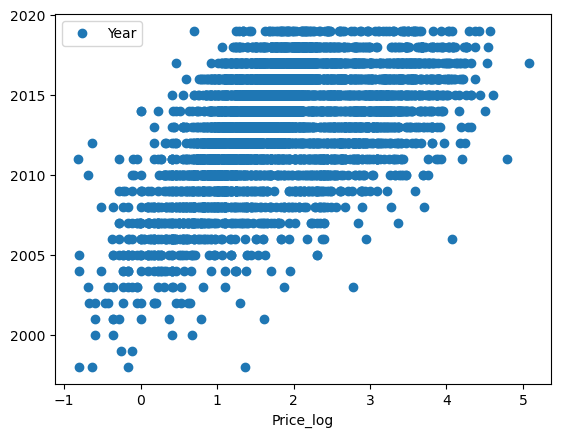

In [25]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'Price_log', y = 'Year', style = 'o')

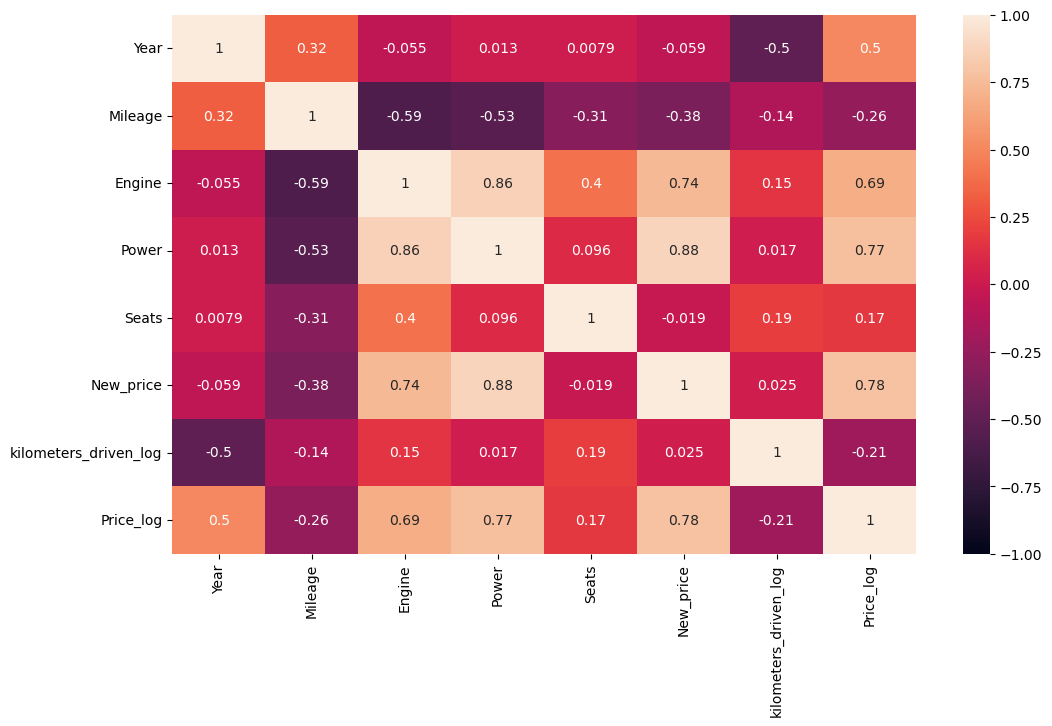

In [26]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(["Kilometers_Driven","Price"],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

In [27]:
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

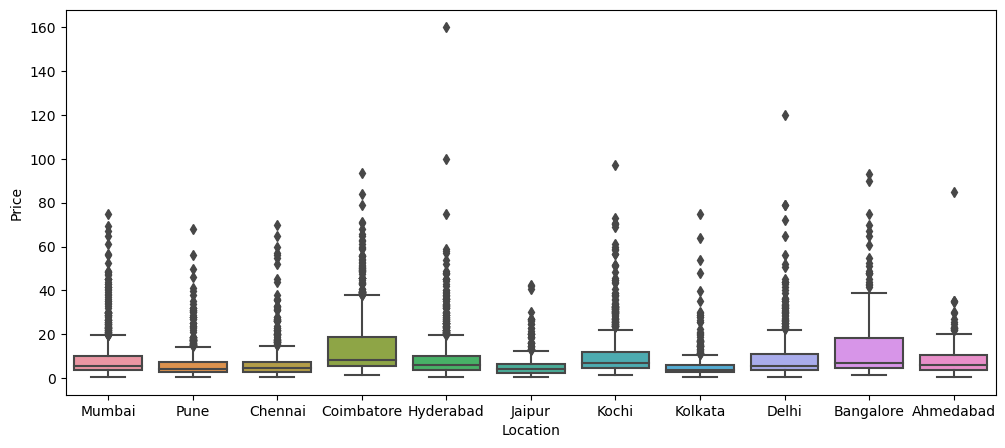

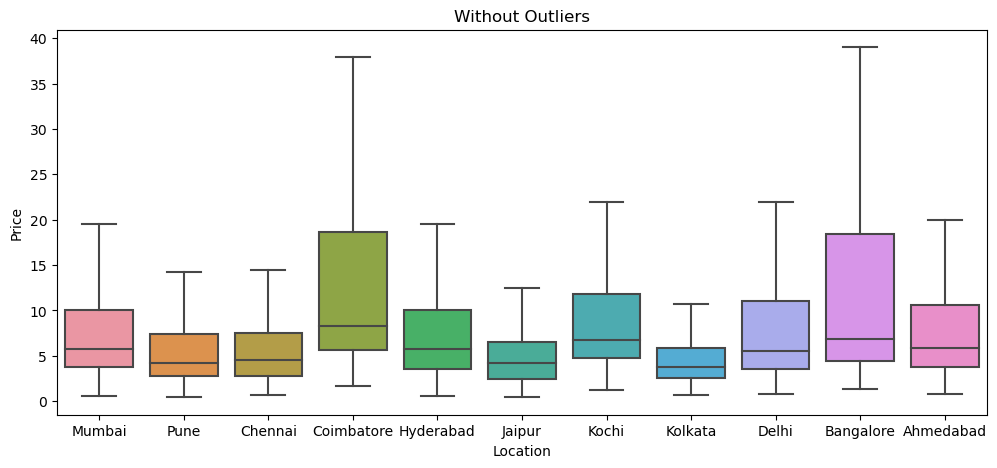

In [28]:
# Box Plot: Price vs Location
boxplot(data['Location'])

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [29]:
data["Name"].apply(lambda x: x.split(" ")[0].lower())

0              maruti
1             hyundai
2               honda
3              maruti
4                audi
            ...      
7248       volkswagen
7249       volkswagen
7250           nissan
7251       volkswagen
7252    mercedes-benz
Name: Name, Length: 7252, dtype: object

In [30]:
# Extract Brand Names
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())

In [31]:
# Extract Model Names
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower())

In [32]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,audi,a4


In [33]:
data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN,11.400999,NaN,volkswagen,vento
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN,10.985293,NaN,volkswagen,polo
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN,10.239960,NaN,nissan,micra
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN,10.864025,NaN,volkswagen,polo
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN,11.190555,NaN,mercedes-benz,e-class


### **Missing value treatment**

In [34]:
data.isnull().sum() # Now check the missing values of each column. Hint: Use isnull() method

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       0
dtype: int64

In [35]:
data['Seats'].isnull().sum() # Checking missing values in the column 'Seats'

53

In [36]:
data["Seats"] = data.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))
# Impute missing values in Seats,you can use fillna method in pandas

In [37]:
data["Seats"].isnull().sum()
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method

3

In [38]:
data["Seats"] = data["Seats"].fillna(5.0)
# fill NaN values with 5.0

In [39]:
data["Mileage"].isnull().sum()
# Now check missing values of each column. Hint: Use isnull() method

2

In [40]:
data["Mileage"].fillna(data['Mileage'].median(),inplace=True)
# Impute missing Mileage. For example, use can use median or any other methods.

In [41]:
data["Mileage"].isnull().sum()
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method

0

In [42]:
data["Engine"].fillna(data['Engine'].median(),inplace=True)
# Impute missing values in the column Engine

In [43]:
data["Power"].fillna(data['Power'].median(),inplace=True)
# Impute missing values in the column Power

In [44]:
data["New_price"].fillna(data['New_price'].median(),inplace=True)
# Impute missing values in the column New_price

In [45]:
cars_data = data[data["Price"].notna()]

# Drop the rows where 'Price' == NaN

In [46]:
cars_data.isnull().sum()
# Check the null values in the data

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
Brand                    0
Model                    0
dtype: int64

**Observations: After imputing, there are no null values left so we can build models.**

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting? We should be dropping skewed data or name data that is not helpful.

In [47]:
# Step-1
X = cars_data.drop(['Name','Price','Price_log','Kilometers_Driven'], axis = 1)

y = cars_data[["Price_log", "Price"]]

In [48]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [49]:
 #Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4212, 264) (1806, 264)


In [50]:
from sklearn import metrics

In [51]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

**Linear Regression Model**

In [52]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [53]:
# Create a linear regression model
lr = LinearRegression()

In [54]:
 #Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 

LinearRegression()

In [55]:
X.columns

Index(['Year', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price',
       'kilometers_driven_log', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore',
       ...
       'Model_xenon', 'Model_xf', 'Model_xj', 'Model_xuv300', 'Model_xuv500',
       'Model_xylo', 'Model_yeti', 'Model_z4', 'Model_zen', 'Model_zest'],
      dtype='object', length=264)

In [56]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.9399395114403347
R-square on test set :  0.8687919879678623
RMSE on training set :  2.738077260682629
RMSE on test set :  4.0370080460818825


In [57]:
import statsmodels.api as sm
# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(X_train)
# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     406.7
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        05:10:45   Log-Likelihood:                 1322.4
No. Observations:                4212   AIC:                            -2187.
Df Residuals:                    3983   BIC:                            -733.7
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [58]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [59]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Model_mustang,0.355458,0.044779
Model_s-class,-0.225627,0.044480
Model_getz,-0.290935,0.032964
Model_accent,-0.295926,0.027946
New_price,-0.000834,0.024525
...,...,...
Brand_maruti,-8.604440,0.000000
Brand_mercedes-benz,-7.370729,0.000000
Brand_mini,-5.927624,0.000000
Brand_mitsubishi,-6.721920,0.000000


In [60]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'New_price', 'Location', 'Fuel_Type', 'Engine', 'Owner_Type', 'Power', 'Transmission', 'kilometers_driven_log', 'Brand', 'Year']


**Ridge Model**

In [61]:
from sklearn.linear_model import Ridge # Import Ridge/ Lasso Regression from sklearn

In [62]:
# Instantiate a Ridge model with alpha = 1.0
ridge_model = Ridge(alpha=1.0)
# Create a Ridge regression model

In [63]:
ridge_model.fit(X_train, y_train['Price_log'])
# Fit Ridge regression model

Ridge()

In [64]:
ridge_score = get_model_score(ridge_model) # Get score of the model

R-sqaure on training set :  0.9305807358112586
R-square on test set :  0.8942380905337286
RMSE on training set :  2.9436845687296698
RMSE on test set :  3.624466406617114


**Decision Tree**

In [65]:
from sklearn.tree import DecisionTreeRegressor # Import Decision tree for Regression from sklearn

In [66]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state=1)

In [67]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(random_state=1)

In [68]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999965696959587
R-square on test set :  0.8017677653029025
RMSE on training set :  0.020692719736775493
RMSE on test set :  4.962112150644958


In [69]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.607232
Year                   0.231208
Engine                 0.045263
Mileage                0.016297
kilometers_driven_log  0.015283
...                         ...
Model_redi             0.000000
Model_a7               0.000000
Model_r-class          0.000000
Model_quanto           0.000000
Model_c-class          0.000000

[264 rows x 1 columns]


**Random Forest**

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [71]:
rf = RandomForestRegressor(n_estimators=100, random_state=1)
# Create a Randomforest regression model 

In [72]:
rf.fit(X_train, y_train['Price_log'])# Fit Randomforest regression model

RandomForestRegressor(random_state=1)

In [73]:
rf_score = get_model_score(rf)# Get score of the model

R-sqaure on training set :  0.9775201867195604
R-square on test set :  0.8507906171037525
RMSE on training set :  1.6751265344024202
RMSE on test set :  4.305043106224706


### **Hyperparameter Tuning: Decision Tree**

In [74]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


# Choose the type of estimator 
dtree_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train['Price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['Price_log'])

RandomForestRegressor(random_state=1)

In [75]:
dtree_tuned_score = get_model_score(dtree_tuned)
# Get score of the dtree_tuned

R-sqaure on training set :  0.9775201867195604
R-square on test set :  0.8507906171037525
RMSE on training set :  1.6751265344024202
RMSE on test set :  4.305043106224706


**Feature Importance**

In [76]:
importance = dtree_tuned.feature_importances_
indices = np.argsort(importance)[::-1]
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))# Print important features of tuned decision tree similar to decision trees

1. feature 3 (0.610148)
2. feature 0 (0.231764)
3. feature 2 (0.037307)
4. feature 6 (0.017660)
5. feature 1 (0.014222)
6. feature 5 (0.006041)
7. feature 14 (0.004906)
8. feature 21 (0.004713)
9. feature 50 (0.004427)
10. feature 4 (0.003408)
11. feature 11 (0.002974)
12. feature 33 (0.002956)
13. feature 200 (0.002882)
14. feature 39 (0.002548)
15. feature 40 (0.002541)
16. feature 42 (0.002349)
17. feature 9 (0.002173)
18. feature 43 (0.001637)
19. feature 23 (0.001602)
20. feature 17 (0.001551)
21. feature 48 (0.001506)
22. feature 27 (0.001502)
23. feature 7 (0.001492)
24. feature 106 (0.001414)
25. feature 25 (0.001414)
26. feature 10 (0.001391)
27. feature 15 (0.001335)
28. feature 20 (0.001300)
29. feature 51 (0.001148)
30. feature 223 (0.001085)
31. feature 16 (0.001056)
32. feature 34 (0.001028)
33. feature 56 (0.001007)
34. feature 12 (0.001003)
35. feature 24 (0.000965)
36. feature 63 (0.000886)
37. feature 152 (0.000844)
38. feature 13 (0.000839)
39. feature 52 (0.000822)


### **Hyperparameter Tuning: Random Forest**

In [77]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[5,7,None],
                'max_features': ['sqrt', 'log2'],
                'n_estimators': [250,500,800,900]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train['Price_log'])

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train['Price_log'])

RandomForestRegressor(max_features='sqrt', n_estimators=900, random_state=1)

In [78]:
rf_tuned_score = get_model_score(rf_tuned)# Get score of the model

R-sqaure on training set :  0.9689916685860145
R-square on test set :  0.8628372337999293
RMSE on training set :  1.967390032403907
RMSE on test set :  4.127599534620007


**Feature Importance**

In [79]:
# Print feature importances of the tuned decision tree
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 3 (0.610148)
2. feature 0 (0.231764)
3. feature 2 (0.037307)
4. feature 6 (0.017660)
5. feature 1 (0.014222)
6. feature 5 (0.006041)
7. feature 14 (0.004906)
8. feature 21 (0.004713)
9. feature 50 (0.004427)
10. feature 4 (0.003408)
11. feature 11 (0.002974)
12. feature 33 (0.002956)
13. feature 200 (0.002882)
14. feature 39 (0.002548)
15. feature 40 (0.002541)
16. feature 42 (0.002349)
17. feature 9 (0.002173)
18. feature 43 (0.001637)
19. feature 23 (0.001602)
20. feature 17 (0.001551)
21. feature 48 (0.001506)
22. feature 27 (0.001502)
23. feature 7 (0.001492)
24. feature 106 (0.001414)
25. feature 25 (0.001414)
26. feature 10 (0.001391)
27. feature 15 (0.001335)
28. feature 20 (0.001300)
29. feature 51 (0.001148)
30. feature 223 (0.001085)
31. feature 16 (0.001056)
32. feature 34 (0.001028)
33. feature 56 (0.001007)
34. feature 12 (0.001003)
35. feature 24 (0.000965)
36. feature 63 (0.000886)
37. feature 152 (0.000844)
38. feature 13 (0.000839)
39. featu

## **Conclusions and Recommendations**

In [86]:
# Defining list of models you have trained
models = [lr, dtree, ridge_model, rf, dtree_tuned, rf_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [88]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Ridge Model', 'Random Forest', 'Tuned Decision Tree', 'Tuned Random Forest'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.939940,0.868792,2.738077,4.037008
1,Decision Tree,0.999997,0.801768,0.020693,4.962112
2,Ridge Model,0.930581,0.894238,2.943685,3.624466
3,Random Forest,0.977520,0.850791,1.675127,4.305043
4,Tuned Decision Tree,0.977520,0.850791,1.675127,4.305043
5,Tuned Random Forest,0.968992,0.862837,1.967390,4.127600


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- Q: How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
- A: Overall, after developing these models and judging their relative performance based on train root mean square error, test root mean square error, and the testing/training accuracies, it seems like the Ridge Model performs the best on both the training and test datasets, with the highest test R-squared coefficient and lowest test RMSE. However, it's important to consider other factors (such as the complexity and interpretability of the model) when choosing the best machine learning model for a specific problem. One model that should particularly grasp our attention is the Hypertuned Random Forest Model. While it has a slightly lower R-squared coefficient than the Ridge Model, it has a lower train RMSE, which indicates that it makes slightly better predictions on the train dataset.The linear regression model performs well on both the training and test datasets, with a high R-squared coefficient and relatively low RMSE values. However, it may not be able to capture complex nonlinear relationships in the data as well as other models.The decision tree model overfits the training data, as evidenced by the near-perfect R-squared coefficient on the training data but a lower R-squared coefficient and higher RMSE on the test data. This suggests that the model has learned the noise in the training data instead of the underlying patterns, and may not generalize well to new data. This model performs relatively well on both the training and test datasets, with a high R-squared coefficient and relatively low RMSE values. However, it may be more complex and less interpretable than some of the other models. The tuned decision tree model performs similarly to the Random Forest model, with a high R-squared coefficient and relatively low RMSE values on both the training and test datasets. However, it may be less robust and more prone to overfitting than other models. Overall, it appears that the Tuned Random Forest and the Ridge Model (in some capacity) are the top-performing models based on the metrics in the table, while the other models have some limitations in terms of their performance or interpretability.

**2. Refined insights:** 
- Q: What are the most meaningful insights relevant to the problem?
- A: Given that the market for used cars in India is rapidly growing, it's important to have a reliable and accurate model for predicting the price of used cars. This can help sellers ensure they are getting a fair price for their car, and help buyers make informed purchasing decisions. Furthermore, the variables that are most predictive of the price of a used car may vary depending on the market and the specific cars being sold. Therefore, it's important to carefully select the variables to include in the model.The Ridge Model and Tuned Random Forest models appear to be the top-performing models based on the metrics in the table. As our goal is to accurately predict the target variable on new data, or, in other words, predict the price of a used car in India based on an array of factors, these models may be the best choice. Linear Regression also performs well on both the training and test datasets, but it may not be able to capture complex nonlinear relationships in the data. So in cases where we have reason to believe that the relationship between the input variables and the target variable is nonlinear, other models may be more appropriate. The Decision Tree model appears to be potentially overfitting the training data, as evidenced by the near-perfect R-squared coefficient on the training data but a lower R-squared coefficient and higher RMSE on the test data. This suggests that the model has learned the noise in the training data instead of the underlying patterns, and may not generalize well to new data. The Random Forest and Tuned Decision Tree models both perform well on the metrics in the table, but they may be more complex and less interpretable than some of the other models. Depending on how much interpretability is a priority for us, simpler models like Linear Regression or the Ridge Model may be more appropriate. In terms of some ways in which we might improve upon our model/approach and think about some actionable items, I've listed some areas for improvement/suggestions to our model: Gather more granular data: Gathering data across more specific cities or regions could help improve the accuracy of the model, as prices and demand for used cars can vary significantly between different areas of the country.

- Collect more detailed information about car condition: Including additional information about the condition of the car, such as any previous accidents or repairs, could help improve the accuracy of the model by better accounting for the impact of wear and tear on the car's value.

- Include more first owner cars: As first owner cars tend to be in better condition and have fewer miles on them, including more of these cars in the dataset could help improve the accuracy of the model and provide a more accurate picture of the used car market.

- Consider the seasonality of car sales: Sales of used cars may be affected by seasonal trends, with demand for certain types of cars or models peaking at different times of the year. Incorporating seasonality factors into the model could help improve its accuracy and provide a more accurate picture of the market.

- Evaluate pricing strategy: Once the model is used to predict the price of used cars, it is important to evaluate the pricing strategy and adjust it as necessary to ensure that the seller is maximizing profit while still being competitive in the market. This could involve adjusting prices based on demand or seasonal trends, or experimenting with different pricing strategies to see which ones are most effective.

- Continuously evaluate and update the model: As the used car market evolves over time, it is important to continuously evaluate and update the model to ensure that it remains accurate and effective. This may involve gathering new data, incorporating new features, or experimenting with different modeling techniques to improve accuracy and better predict prices for used cars in India.








**3. Proposal for the final solution design:** 
- Q: What model do you propose to be adopted? Why is this the best solution to adopt?
- A: The model I propose to be adopted is the Tuned Random Forest Model, in other words I would like to propose the following final solution design: Gathering used car data -> Performing some rudimentary preprocessing with the data -> Executing our feature engineering and missing value treatment on the data -> Building our Random Tree Regression Model -> Tuning said model with grid search cross-validation -> Make our prediciton of the price of a used car. I went this route because, alongside the Ridge Model it was certainly one of our top performers. In terms of regression analysis, the Random Forest approach does well and has a great capacity to handle continuous variables. Unlike linear regression, as mentioned earlier, we are much more well-equipped to deal with non-linear solutions if we adopt the Tuned Random Forest Model and this benefit caters well to real-world scenarios. Lastly, with the Random Forest approach, we will need little data augementation and data preprocessing, which is also a plus. Our Random Forest model, as is the case with all of our models, has its strengths and its fallbacks, but as we are adopting the Tuned Random Forest Model, we can optimize and use this model further for more data collection and increased Random Forest Tuning. 